In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'MyDrive/ML/Projects/Concrete/'
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML/Projects/Concrete
data/  Regression.ipynb


### **Libraries**

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from pylab import rcParams
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

###**Read Data**

In [3]:
df=pd.read_csv("data/Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30




1.   Target variable-  csMP(concreat strength  )-**Numerical Data**
2.   Feature-cement,  slag,  flyash,  water, superplasticizser,  coarseaggregates,  fineaggregate,  age-**Numerical data**


3.   cement-amount of cement
4.   slag-amount of slag
5.   flyash-amount of flyash
6.   water-amount of water
7.   superplasticizser-amount of superplasticizse
8.   coarseaggregates-amount of coarseaggregates
9.   fineaggregate-amount of fineaggregat
10.  age-quantity of age







###**EDA**

In [4]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)



1.   No of Rows-there are **1030** sample in training data
2.   column-there are **9** columns in training data



####**Train-Test splite**

In [6]:
y=df.csMPa
X=df.drop('csMPa',axis=1)

In [7]:
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
X_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
741,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28
993,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90


In [9]:
X_train.shape

(824, 8)



1.   Training Data has **824** **data pont**
2.   Training Data has **8** **Columns**



In [10]:
X_val.shape

(206, 8)



1.   Validation Data has **206 data point**
2.   Validation Data has **8 Columns**


#### **Distribution Of Target in Training set and Validation Set**

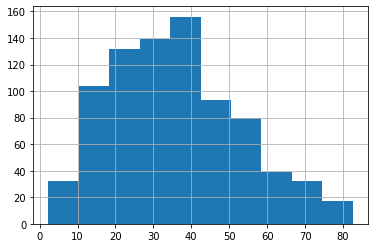

In [11]:
y_train.hist()

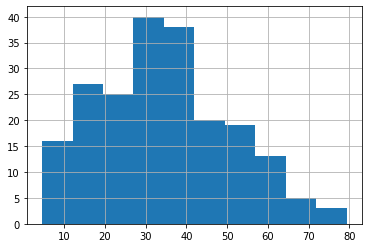

In [12]:
y_val.hist()



1.   **Training Target variable and Validation Target variable have almost same ditribution**




#### **Distribution Of Features**

(array([ 7.,  6.,  8., 31., 49., 50., 26., 17., 39., 11., 58., 17., 31.,
        54., 13., 24., 21., 32., 26., 29., 28., 25., 15., 28., 15., 31.,
        25.,  7.,  0., 27.,  5., 11.,  0.,  3., 18.,  8.,  9.,  1.,  8.,
        11.]),
 array([102.  , 112.95, 123.9 , 134.85, 145.8 , 156.75, 167.7 , 178.65,
        189.6 , 200.55, 211.5 , 222.45, 233.4 , 244.35, 255.3 , 266.25,
        277.2 , 288.15, 299.1 , 310.05, 321.  , 331.95, 342.9 , 353.85,
        364.8 , 375.75, 386.7 , 397.65, 408.6 , 419.55, 430.5 , 441.45,
        452.4 , 463.35, 474.3 , 485.25, 496.2 , 507.15, 518.1 , 529.05,
        540.  ]),
 <a list of 40 Patch objects>)

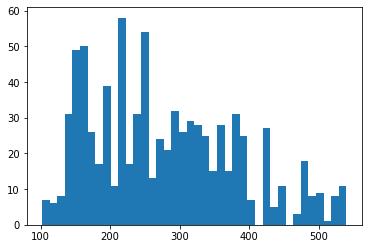

In [13]:
plt.hist(x='cement',bins=40,data=X_train,label='Cement')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1181f42110>,
      dtype=object)

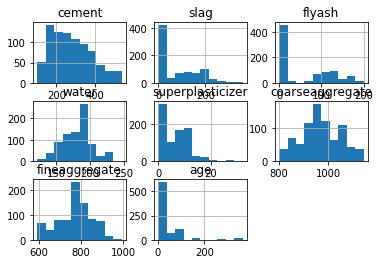

In [14]:
X_train.hist()



1.  **Slag , flyash , age feature have skewness** in training data




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1181b8d490>,
      dtype=object)

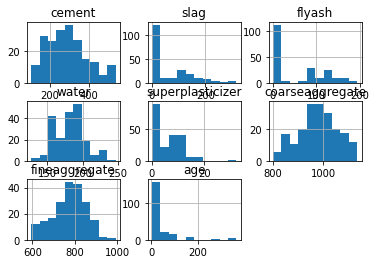

In [15]:
X_val.hist()



1.**slag , flyash , age feature  have skewness in Val sat**




#### **Relationship Between Feature And Target**

Text(0, 0.5, 'Target')

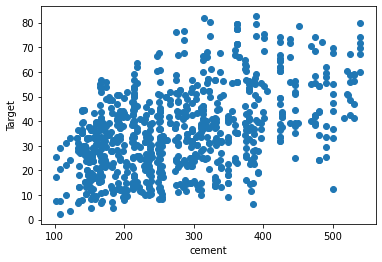

In [16]:
plt.scatter(X_train.cement,y_train)
plt.xlabel('cement')
plt.ylabel('Target')



1.   **strength of concreat wil increase upto a certain limit with cement amount then it starts decreasing as we increase cement amoun**t




Text(0, 0.5, 'Target')

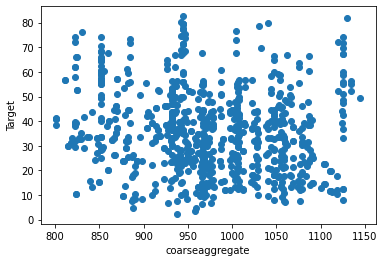

In [17]:

plt.scatter(X_train.coarseaggregate,y_train)
plt.xlabel('coarseaggregate')
plt.ylabel('Target')




1.  **As we increase value of coarseaggregate, strength of concreat  increases and decreases.**




Text(0, 0.5, 'Target')

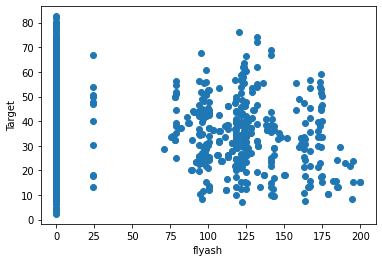

In [18]:
plt.scatter(X_train.flyash,y_train)
plt.xlabel('flyash')
plt.ylabel('Target')





1.   **Max strength we get when flyash is 0.**



Text(0, 0.5, 'Target')

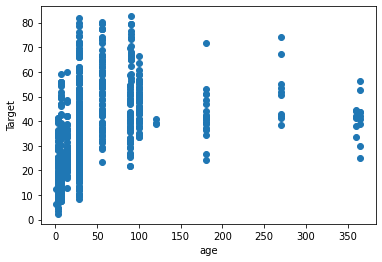

In [19]:
plt.scatter(X_train.age,y_train)
plt.xlabel('age')
plt.ylabel('Target')



1.   **As age of concreat increases, strength of concreat also increases upto  certain value.**



Text(0, 0.5, 'Target')

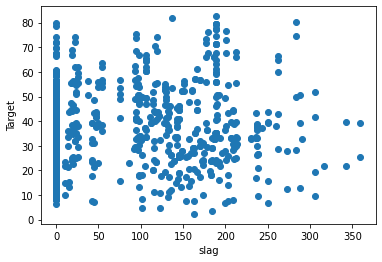

In [20]:
plt.scatter(X_train.slag,y_train)
plt.xlabel('slag')
plt.ylabel('Target')



1.   **With the increase in slag , value of strenght increase and decrease .Slag value have no strong relation with targe**t
*



Text(0, 0.5, 'Target')

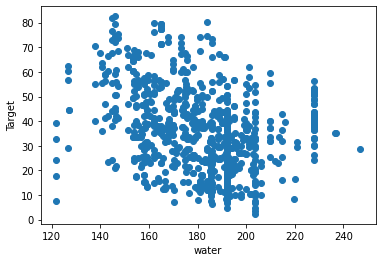

In [21]:
plt.scatter(X_train.water,y_train)
plt.xlabel('water')
plt.ylabel('Target')




1.  **As we add more water , strength of concreat decreases**


Text(0, 0.5, 'Target')

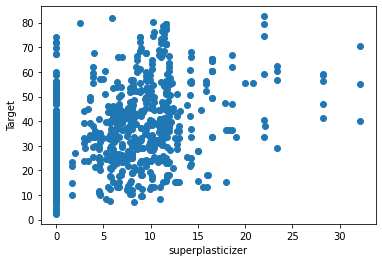

In [22]:
plt.scatter(X_train.superplasticizer,y_train)
plt.xlabel('superplasticizer')
plt.ylabel('Target')



1.   **As we increases amount of superplasticizer, strength increases**



Text(0, 0.5, 'Target')

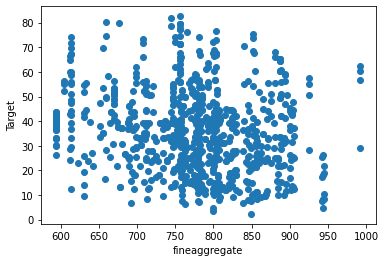

In [23]:
plt.scatter(X_train.fineaggregate,y_train)
plt.xlabel('fineaggregate')
plt.ylabel('Target')

#### **Relationship Among features**

In [24]:
X_train.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
cement,1.000000,-0.256474,-0.403533,-0.066940,0.102599,-0.116715,-0.224939,0.084357
slag,-0.256474,1.000000,-0.343278,0.107604,0.038798,-0.297780,-0.287375,-0.041205
flyash,-0.403533,-0.343278,1.000000,-0.242095,0.352899,0.002429,0.073800,-0.147593
water,-0.066940,0.107604,-0.242095,1.000000,-0.660295,-0.180919,-0.466366,0.257324
superplasticizer,0.102599,0.038798,0.352899,-0.660295,1.000000,-0.264236,0.223152,-0.190388
coarseaggregate,-0.116715,-0.297780,0.002429,-0.180919,-0.264236,1.000000,-0.160785,0.026095
fineaggregate,-0.224939,-0.287375,0.073800,-0.466366,0.223152,-0.160785,1.000000,-0.159842
age,0.084357,-0.041205,-0.147593,0.257324,-0.190388,0.026095,-0.159842,1.000000


Text(0, 0.5, 'flyash')

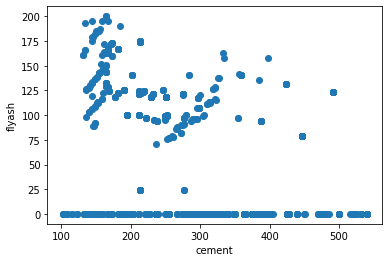

In [25]:
plt.scatter(X_train.cement,X_train.flyash)
plt.xlabel('cement')
plt.ylabel('flyash')



1.**As amount of cement increases ,amount of flyash decreases**



Text(0, 0.5, 'superplasticizer')

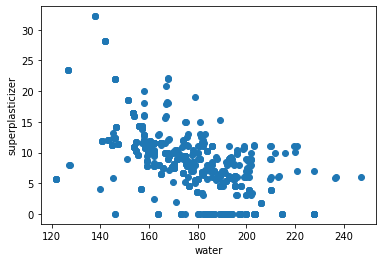

In [26]:
plt.scatter(X_train.water,X_train.superplasticizer)
plt.xlabel('water')
plt.ylabel('superplasticizer')



1.   **As we incraeses quantity of water , amount of superplasticizer needed decreases**



In [27]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### **Model Selection**

#### **Polynomial Regression Model with Two Three Degree**

In [28]:
poly = PolynomialFeatures(degree=3)
X_train_trans = poly.fit_transform(X_train)
X_val_trans = poly.fit_transform(X_val)

clf = LinearRegression()
clf.fit(X_train_trans, y_train)
y_train_pred= clf.predict(X_train_trans)
y_val_pred=clf.predict(X_val_trans)
result_train=metrics.r2_score(y_train,y_train_pred)
result_val=metrics.r2_score(y_val,y_val_pred)
print('Training r2 ',result_train, "Validation r2 ",result_val)
mse_train=metrics.mean_squared_error(y_train,y_train_pred)
mse_val=metrics.mean_squared_error(y_val,y_val_pred)

print("for training MSE {} and for val MSE {}".format(mse_train,mse_val))

Training r2  0.9321177548497587 Validation r2  0.8058978573061046
for training MSE 19.161017354399664 and for val MSE 51.122552989943884


####**Random Forest Regression**

In [29]:
rf=RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

rf_pred_val_result=rf.predict(X_val)
rf_pred_train_result=rf.predict(X_train)

r2_train=metrics.r2_score(y_train,rf_pred_train_result)
r2_val=metrics.r2_score(y_val,rf_pred_val_result)

mse_train=metrics.mean_squared_error(y_train,rf_pred_train_result)
mse_val=metrics.mean_squared_error(y_val,rf_pred_val_result)

print("R2 for training: {} R2 for validation {} ".format(r2_train,r2_val))
print("MSE for Training : {} MSE for Validation {}".format(mse_train,mse_val))

R2 for training: 0.9850429709250735 R2 for validation 0.9254656405872087 
MSE for Training : 4.221897685331765 MSE for Validation 19.630832950984143




1. Selected "**RandomForset Model"** 



### **Hyperparameter Tuning** for **RandomForest**

---



In [30]:
rf=RandomForestRegressor(random_state=0)
param_grid = {  'bootstrap': [False, True], 'max_depth': [5, 10,20, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [ 20,50,100,150,200,250,300]}

split_index = [-1 if indx in X_train.index else 0 for indx in X.index]
pds = PredefinedSplit(test_fold = split_index)

g_search = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = pds, n_jobs = -1,  return_train_score=True)
g_search.fit(X,y)
print(g_search.best_params_)

print(g_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
0.9291649180388035


###**Random Forest Regression After Hyperparameter Tunning**

In [31]:
rf=RandomForestRegressor(bootstrap=True,max_depth=5, max_features='auto', n_estimators=200,random_state=0)

rf.fit(X_train,y_train)

rf_pred_val_result=rf.predict(X_val)
rf_pred_train_result=rf.predict(X_train)

r2_train=metrics.r2_score(y_train,rf_pred_train_result)
r2_val=metrics.r2_score(y_val,rf_pred_val_result)

mse_train=metrics.mean_squared_error(y_train,rf_pred_train_result)
mse_val=metrics.mean_squared_error(y_val,rf_pred_val_result)

print("R2 for training: {} R2 for validation {} ".format(r2_train,r2_val),'\n')
print("MSE for Training : {} MSE for Validation {}".format(mse_train,mse_val),'\n')

print("RMSE for Training : {} RMSE for Validation {}".format(np.sqrt(mse_train),np.sqrt(mse_val)))

R2 for training: 0.8891369689134896 R2 for validation 0.854119546244056  

MSE for Training : 31.293137961310098 MSE for Validation 38.421941787095285 

RMSE for Training : 5.594026989683737 RMSE for Validation 6.198543521432699




1. **R2** for **Training**: **0.8891369689134896** **R2** for **Validation**: **0.854119546244056** 
2. **We reduced the overfitting**

#### **Feature** **Importance**

False

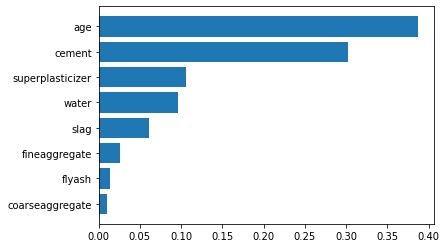

In [32]:
importances = rf.feature_importances_

indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))== ax.set_yticklabels(np.array(X_train.columns)[indices])

In [33]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000
